In [18]:
# Import components
import datetime as dt
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
from matplotlib import pyplot as pltw
from pmdarima import arima, datasets, model_selection, utils
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import STL

plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")  # グラフのスタイル
plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

df = pd.read_csv("../datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()

In [20]:
df.head()

,User,date,battery,state,weekday,time_to_num
0,Narita,2021-12-04 01:52:00,60,ON,5,6773
1,Narita,2021-12-04 02:22:00,73,OFF,5,8566
2,Narita,2021-12-04 07:06:00,71,ON,5,25564
3,Narita,2021-12-04 07:15:00,73,OFF,5,26105
4,Narita,2021-12-04 07:15:00,73,ON,5,26113


In [21]:
df = df.set_index(df["date"]).drop(columns=["date"])

In [22]:
data = df.loc[(df["User"] == "Narita") & (df["state"] == "ON")]["battery"]

In [23]:
data

date
2021-12-04 01:52:00    60
2021-12-04 07:06:00    71
2021-12-04 07:15:00    73
2021-12-07 07:09:00    30
2021-12-07 08:38:00    42
                       ..
2022-03-31 07:50:00    61
2022-03-31 09:27:00    75
2022-03-31 10:02:00    73
2022-03-31 11:51:00    86
2022-03-31 16:34:00    57
Name: battery, Length: 280, dtype: int64

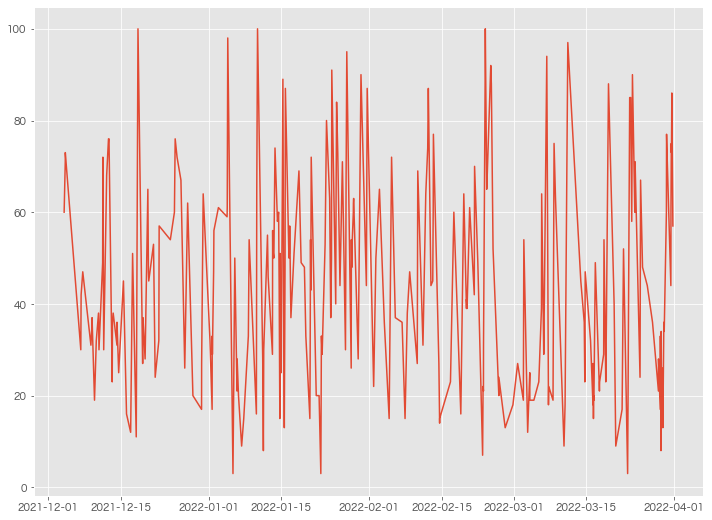

In [24]:
plt.plot(data)

/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


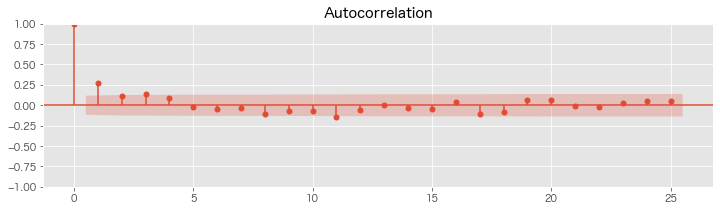

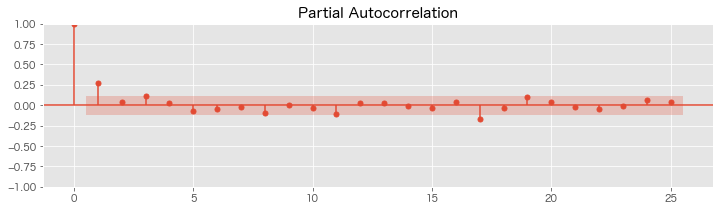

In [27]:
# グラフのサイズ変更
plt.rcParams["figure.figsize"] = [12, 3]
# 自己相関と偏自己相関(原系列)
utils.plot_acf(data, alpha=0.05)
utils.plot_pacf(data, alpha=0.05)

/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


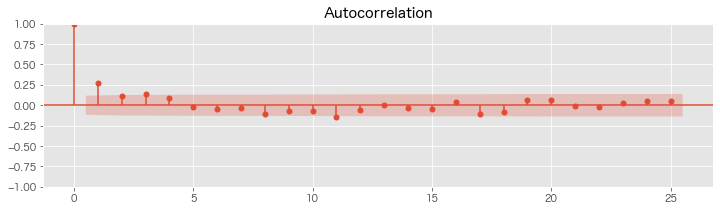

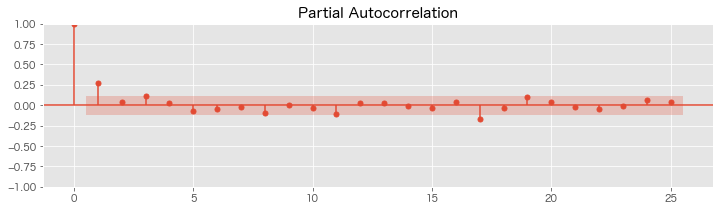

In [37]:
# グラフのサイズ変更
plt.rcParams["figure.figsize"] = [12, 3]
# 自己相関と偏自己相関(原系列)
utils.plot_acf(data, alpha=0.05)
utils.plot_pacf(data, alpha=0.05)

In [40]:
# 階差の次数の検討
print("d =", arima.ndiffs(data))  # d（階差）
print("D =", arima.nsdiffs(data, m=2))  # D（季節階差）

d = 0
D = 0


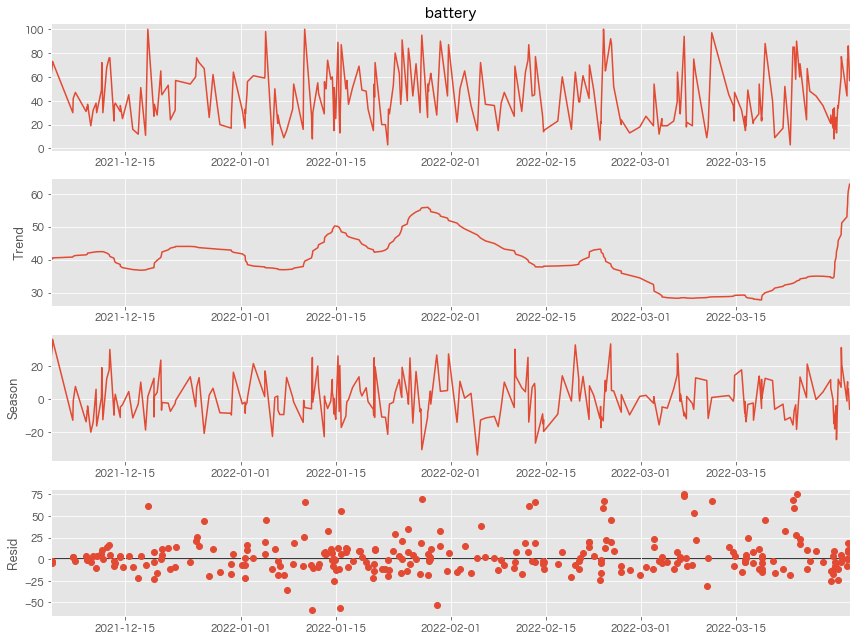

In [59]:
result_stl = STL(data, period=17, robust=True).fit()
result_stl.plot()
plt.show()

In [45]:
len(data)

280

In [65]:
# 最新3年間のデータをTest, それ以外をTrainとする。
# pm.auto_arimaで AR,I,MAそれぞれの適切なパラメータを決める(auto AIC)
train, test = model_selection.train_test_split(data, train_size=150)
arima_model = pm.auto_arima(
    train, seasonal=False, m=17, n_jobs=-1, trace=True, maxiter=10
)

/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (17) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1365.099, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1608.461, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1426.000, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1522.395, Time=0.02 sec


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1365.587, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1388.369, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1365.734, Time=0.08 sec


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/isshintoy

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1366.631, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1361.571, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1500.306, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1398.689, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1354.739, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1353.431, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1353.804, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1355.113, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1353.159, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1354.567, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1356.312, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.122 seconds


/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [66]:
test.shape[0]

130

MAE:
21.864934406106183
MAPE(%):
93.23871880538117


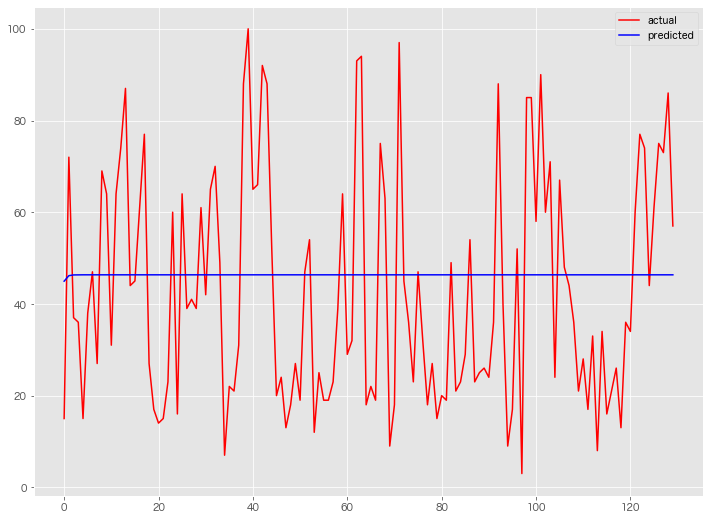

In [67]:
# グラフのサイズ変更
from statistics import mean

plt.rcParams["figure.figsize"] = [12, 9]
# 予測
preds, conf_int = arima_model.predict(n_periods=test.shape[0], return_conf_int=True)
# 予測精度
print("MAE:")
print(mean_absolute_error(test, preds))
print("MAPE(%):")
print(mean(abs(test - preds) / test) * 100)
# 予測と実測の比較（グラフ）
x_axis = np.arange(preds.shape[0])
plt.plot(x_axis, test, label="actual", color="r")
plt.plot(x_axis, preds, label="predicted", color="b")

plt.legend()
plt.show()